In [24]:
import pandas as pd


# Load the CSV file
data = pd.read_csv("position_data.csv")

# Display the first few rows to verify the data
print(data.head())

     Ax    Ay    Az  Pitch    Roll  Sleep Position
0  0.00 -0.00  0.99   0.02   -0.16             NaN
1  0.00 -0.00  0.99   0.06   -0.04             NaN
2  1.07 -0.03  0.12  83.73  -13.99             NaN
3  0.87  0.13 -0.12  97.62  131.72             NaN
4  0.91  0.14 -0.09  95.56  123.20             NaN


In [25]:
data=data.drop('Sleep Position', axis=1, inplace=False)

In [26]:
data.loc[0] = [0.00, -0.00, 0.12, 83.73, -10]
data.loc[1] = [0.00, -0.00, 0.12, 83.73, -10]
#data

In [27]:
df=pd.DataFrame(data, columns=['Pitch', 'Roll'])
df
array = df.to_numpy()

In [28]:
# Sleep position detection function
def detect_sleep_position(pitch, roll):
    # Directly using simple if-elif-else to detect position
    if abs(roll) < 15 and pitch > -20 and pitch < 20:
        print("Position: Back Sleeping")
    elif abs(roll) > 30 and pitch > -20 and pitch < 20:
        print("Position: Side Sleeping")
    elif abs(roll) < 15 and pitch > 20:
        print("Position: Stomach Sleeping")
    else:
        print("Position: Unknown/Transition")



# Loop to check each row and detect sleep position
for entry in array:
    pitch = entry[0]
    roll = entry[1]
    detect_sleep_position(pitch, roll)  # Detect and print sleep position

Position: Stomach Sleeping
Position: Stomach Sleeping
Position: Stomach Sleeping
Position: Unknown/Transition
Position: Unknown/Transition
Position: Back Sleeping
Position: Back Sleeping
Position: Back Sleeping
Position: Back Sleeping
Position: Back Sleeping
Position: Unknown/Transition
Position: Unknown/Transition
Position: Unknown/Transition
Position: Unknown/Transition
Position: Unknown/Transition


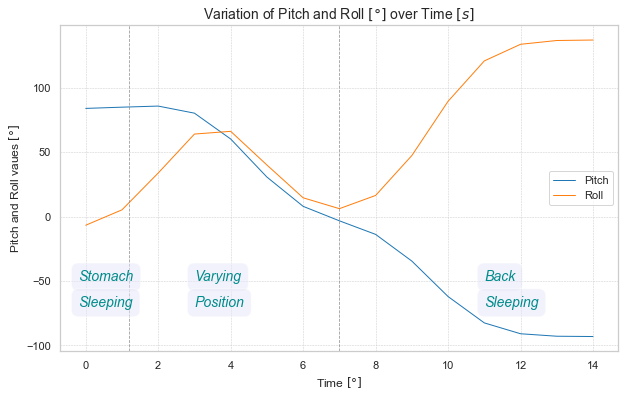

In [49]:
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import seaborn as sn

# Apply Gaussian filter (sigma controls the smoothing)
y1_smooth = gaussian_filter(data['Pitch'], sigma=1.3)  # Higher sigma = smoother
y2_smooth = gaussian_filter(data['Roll'], sigma=1.3)  # High

# Use Seaborn's 'darkgrid' style
sns.set(style='whitegrid')

# Plotting Pitch and Roll
plt.figure(figsize=(10, 6))  # Set the figure size

plt.plot(data.index, y1_smooth, label='Pitch', color='tab:blue', linewidth=1)
plt.plot(data.index, y2_smooth, label='Roll', color='tab:orange', linewidth=1)

# Add a vertical dashed line at x = 1.2
plt.axvline(x=1.2, color='tab:grey', linestyle='--', alpha= 0.8, linewidth=0.8)
# Add a vertical dashed line at x = 1.2
plt.axvline(x=7, color='tab:grey', linestyle='--', alpha= 0.8, linewidth=0.8)
# Add text at a specific point (for example at x=2, y=4)
plt.text(-0.2,-50, "Stomach", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))
plt.text(-0.2,-70, "Sleeping", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))

plt.text(3,-50, "Varying", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))
plt.text(3,-70, "Position", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))

plt.text(11,-50, "Back", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))
plt.text(11,-70, "Sleeping", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))



# Adding title and labels
plt.title('Variation of Pitch and Roll $[°]$ over Time $[s]$', fontsize=14)
plt.xlabel('Time $[°]$', fontsize=12)  # X-axis label
plt.ylabel('Pitch and Roll vaues $[°]$', fontsize=12)  # Y-axis label
# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display legend
plt.legend()

# Show the plot
plt.grid(True)

# Save the plot 
plt.savefig("PitchRollVar_time.svg")   # Save as SVG
plt.savefig("PitchRollVar_time.png")   # Save as PNG
plt.show()

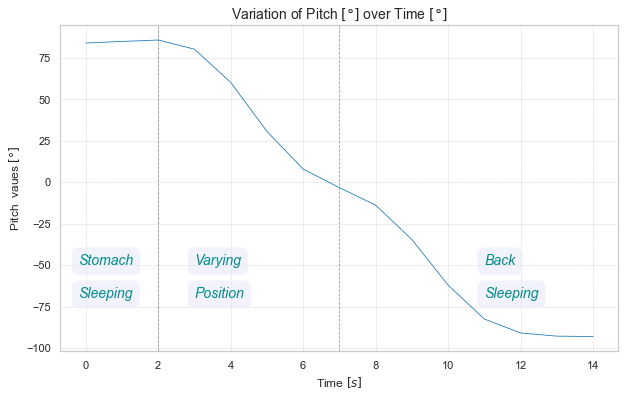

In [50]:


# Apply Gaussian filter (sigma controls the smoothing)
y1_smooth = gaussian_filter(data['Pitch'], sigma=1.3)  # Higher sigma = smoother

import seaborn as sns
# Use Seaborn's 'darkgrid' style
sns.set(style='whitegrid')

# Plotting Pitch and Roll
plt.figure(figsize=(10, 6))  # Set the figure size

plt.plot(data.index, y1_smooth, label='Pitch', color='tab:blue', linewidth=0.8)

# Add a vertical dashed line at x = 1.2
plt.axvline(x=2, color='tab:grey', linestyle='--', alpha= 0.8, linewidth=0.8)
# Add a vertical dashed line at x = 1.2
plt.axvline(x=7, color='tab:grey', linestyle='--', alpha= 0.8, linewidth=0.8)
# Add text at a specific point (for example at x=2, y=4)
plt.text(-0.2,-50, "Stomach", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))
plt.text(-0.2,-70, "Sleeping", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))

plt.text(3,-50, "Varying", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))
plt.text(3,-70, "Position", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))

plt.text(11,-50, "Back", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))
plt.text(11,-70, "Sleeping", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))


# Adding title and labels
plt.title('Variation of Pitch $[°]$ over Time $[°]$', fontsize=14)
plt.xlabel('Time $[s]$', fontsize=12)  # X-axis label
plt.ylabel('Pitch  vaues $[°]$', fontsize=12)  # Y-axis label
# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display legend
#plt.legend()

# Show the plot
plt.grid(True)

# Save the plot 
plt.savefig("PitchVar_time.svg")   # Save as SVG
plt.savefig("PitchVar_time.png")   # Save as PNG

plt.show()

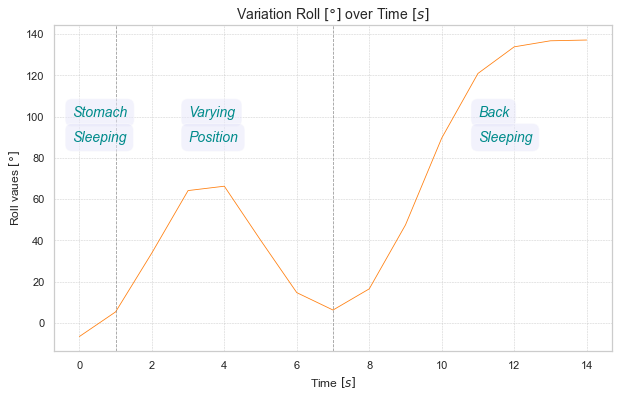

In [51]:
from scipy.ndimage import gaussian_filter

# Apply Gaussian filter (sigma controls the smoothing)

y2_smooth = gaussian_filter(data['Roll'], sigma=1.3)  # High

# Use Seaborn's 'darkgrid' style
sns.set(style='whitegrid')

# Plotting Pitch and Roll
plt.figure(figsize=(10, 6))  # Set the figure size


plt.plot(data.index, y2_smooth, label='Roll', color='tab:orange', linewidth=0.8)
# Add a vertical dashed line at x = 1.2
plt.axvline(x=1, color='tab:grey', linestyle='--', alpha= 0.8, linewidth=0.8)
# Add a vertical dashed line at x = 1.2
plt.axvline(x=7, color='tab:grey', linestyle='--', alpha= 0.8, linewidth=0.8)
# Add text at a specific point (for example at x=2, y=4)
plt.text(-0.2,100, "Stomach", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))
plt.text(-0.2,88, "Sleeping", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))

plt.text(3,100, "Varying", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))
plt.text(3,88, "Position", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))

plt.text(11,100, "Back", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))
plt.text(11,88, "Sleeping", fontsize=14, style='italic', color='darkcyan', bbox=dict(facecolor='lavender', alpha=0.5, boxstyle='round,pad=0.5'))


# Adding title and labels
plt.title('Variation Roll $[°]$ over Time $[s]$', fontsize=14)
plt.xlabel('Time $[s]$', fontsize=12)  # X-axis label
plt.ylabel('Roll vaues $[°]$', fontsize=12)  # Y-axis label
# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display legend
#plt.legend()

# Show the plot
plt.grid(True)

# Save the plot 
plt.savefig("RollVar_time.svg")   # Save as SVG
plt.savefig("RollVar_time.png")   # Save as PNG


plt.show()